<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/03_vectorization_techniques_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [
    "I love machine learning and natural language processing.",
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing helps computers understand human language.",
    "Deep learning is a powerful machine learning technique.",
    "Python is great for machine learning and data science.",
    "Text mining and natural language processing are related fields.",
    "Artificial intelligence will transform many industries.",
    "Data science combines statistics, programming, and domain knowledge."
]

# Text preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    return text

processed_docs = [preprocess(doc) for doc in documents]


In [2]:
print("=== Bag of Words ===")
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(processed_docs)
bow_features = bow_vectorizer.get_feature_names_out()

# Convert to DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_features)

print(bow_df.head())

=== Bag of Words ===
   artificial  combines  computers  data  deep  domain  fields  great  helps  \
0           0         0          0     0     0       0       0      0      0   
1           1         0          0     0     0       0       0      0      0   
2           0         0          1     0     0       0       0      0      1   
3           0         0          0     0     1       0       0      0      0   
4           0         0          0     1     0       0       0      1      0   

   human  ...  programming  python  related  science  statistics  subset  \
0      0  ...            0       0        0        0           0       0   
1      0  ...            0       0        0        0           0       1   
2      1  ...            0       0        0        0           0       0   
3      0  ...            0       0        0        0           0       0   
4      0  ...            0       1        0        1           0       0   

   technique  text  transform  understand

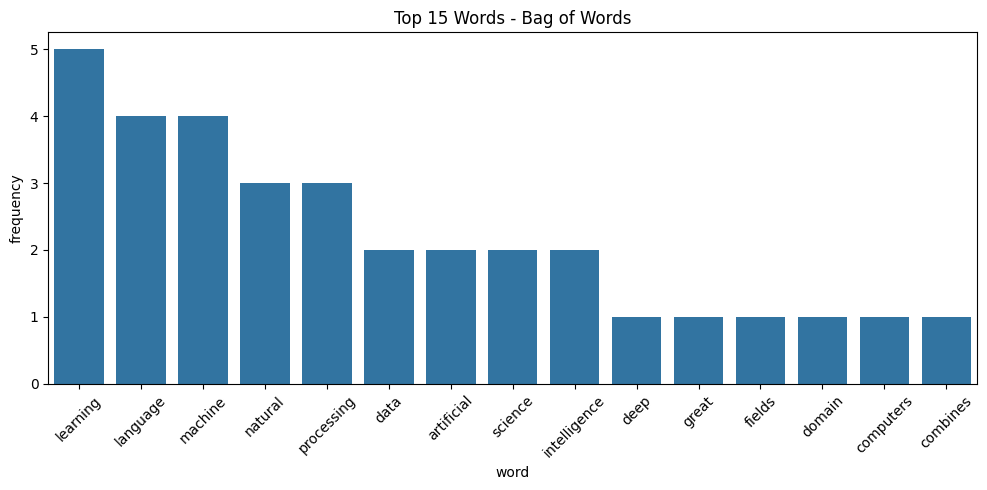

In [3]:
bow_freq = np.array(bow_matrix.sum(axis=0)).flatten()
bow_freq_df = pd.DataFrame({'word': bow_features, 'frequency': bow_freq})
bow_freq_df = bow_freq_df.sort_values(by='frequency', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='word', y='frequency', data=bow_freq_df.head(15))
plt.title("Top 15 Words - Bag of Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

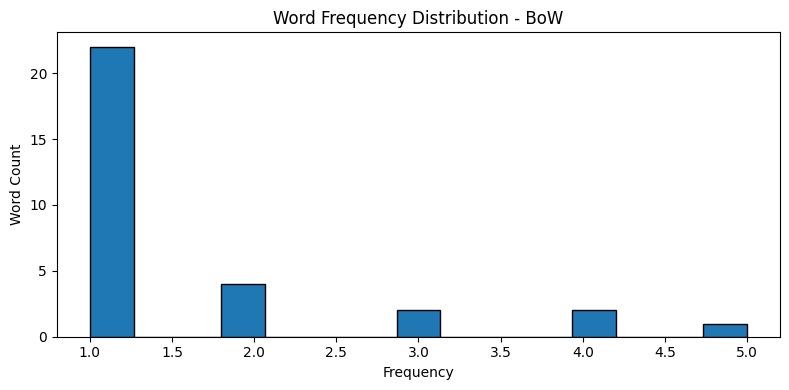

In [4]:
plt.figure(figsize=(8,4))
plt.hist(bow_freq, bins=15, edgecolor='black')
plt.title("Word Frequency Distribution - BoW")
plt.xlabel("Frequency")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()

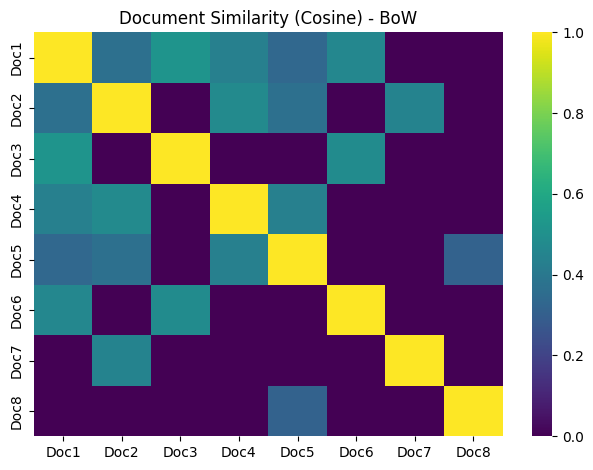

In [5]:
bow_cos_sim = cosine_similarity(bow_matrix)
sns.heatmap(bow_cos_sim, cmap='viridis', xticklabels=[f'Doc{i+1}' for i in range(len(documents))],
            yticklabels=[f'Doc{i+1}' for i in range(len(documents))])
plt.title("Document Similarity (Cosine) - BoW")
plt.tight_layout()
plt.show()


In [6]:
print("=== TF-IDF ===")
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs)
tfidf_features = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

print(tfidf_df.head())

=== TF-IDF ===
   artificial  combines  computers      data      deep  domain  fields  \
0    0.000000       0.0   0.000000  0.000000  0.000000     0.0     0.0   
1    0.467852       0.0   0.000000  0.000000  0.000000     0.0     0.0   
2    0.000000       0.0   0.374292  0.000000  0.000000     0.0     0.0   
3    0.000000       0.0   0.000000  0.000000  0.446754     0.0     0.0   
4    0.000000       0.0   0.000000  0.408509  0.000000     0.0     0.0   

      great     helps     human  ...  programming    python  related  \
0  0.000000  0.000000  0.000000  ...          0.0  0.000000      0.0   
1  0.000000  0.000000  0.000000  ...          0.0  0.000000      0.0   
2  0.000000  0.374292  0.374292  ...          0.0  0.000000      0.0   
3  0.000000  0.000000  0.000000  ...          0.0  0.000000      0.0   
4  0.487436  0.000000  0.000000  ...          0.0  0.487436      0.0   

    science  statistics    subset  technique  text  transform  understand  
0  0.000000         0.0  0.0000

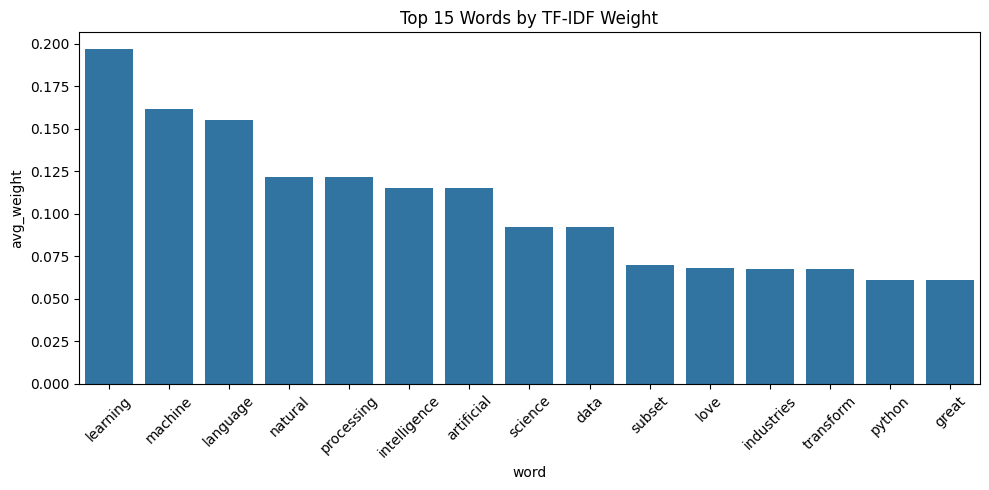

In [7]:
avg_tfidf = tfidf_matrix.mean(axis=0).A1
tfidf_weight_df = pd.DataFrame({'word': tfidf_features, 'avg_weight': avg_tfidf})
top_tfidf = tfidf_weight_df.sort_values(by='avg_weight', ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(x='word', y='avg_weight', data=top_tfidf)
plt.title("Top 15 Words by TF-IDF Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


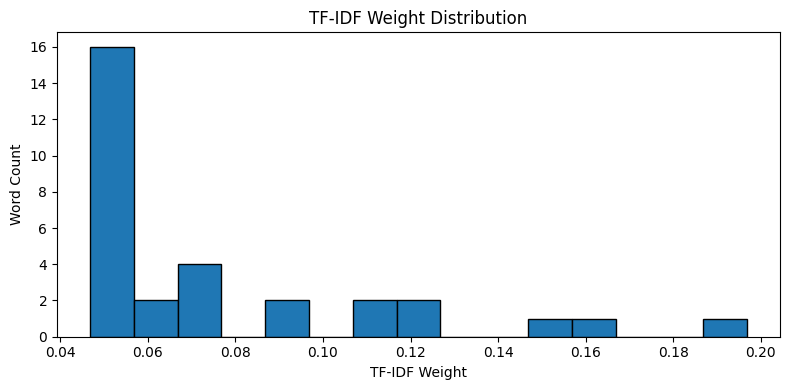

In [8]:
plt.figure(figsize=(8,4))
plt.hist(avg_tfidf, bins=15, edgecolor='black')
plt.title("TF-IDF Weight Distribution")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()

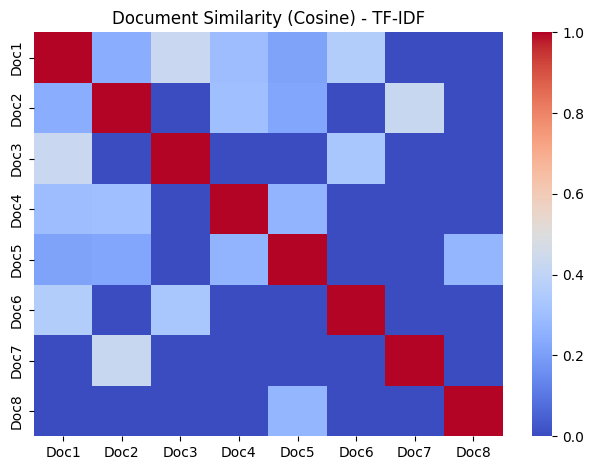

In [9]:
tfidf_cos_sim = cosine_similarity(tfidf_matrix)
sns.heatmap(tfidf_cos_sim, cmap='coolwarm', xticklabels=[f'Doc{i+1}' for i in range(len(documents))],
            yticklabels=[f'Doc{i+1}' for i in range(len(documents))])
plt.title("Document Similarity (Cosine) - TF-IDF")
plt.tight_layout()
plt.show()


In [10]:
print("=== Bigrams (n-grams) ===")
bigram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
bigram_matrix = bigram_vectorizer.fit_transform(processed_docs)
bigram_features = bigram_vectorizer.get_feature_names_out()

bigram_freq = np.array(bigram_matrix.sum(axis=0)).flatten()
bigram_df = pd.DataFrame({'bigram': bigram_features, 'frequency': bigram_freq})
bigram_df = bigram_df.sort_values(by='frequency', ascending=False)

=== Bigrams (n-grams) ===


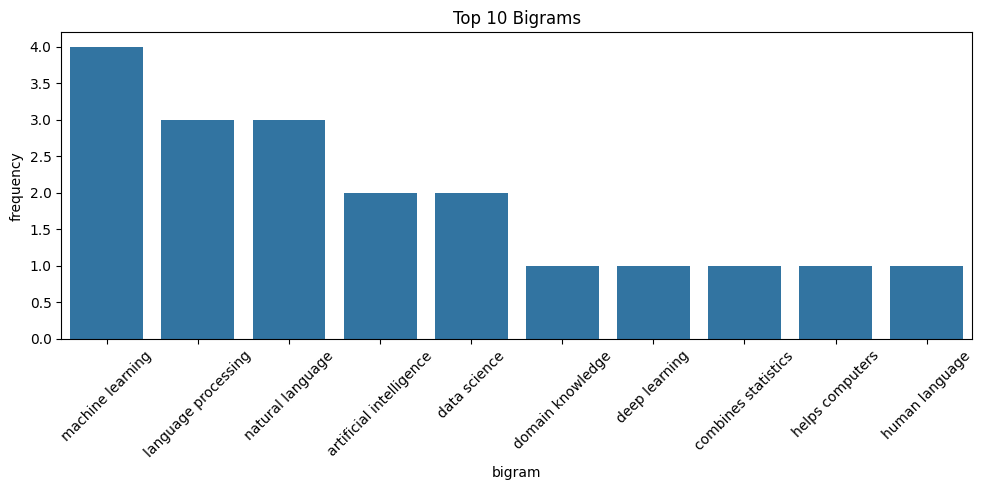

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='bigram', y='frequency', data=bigram_df.head(10))
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

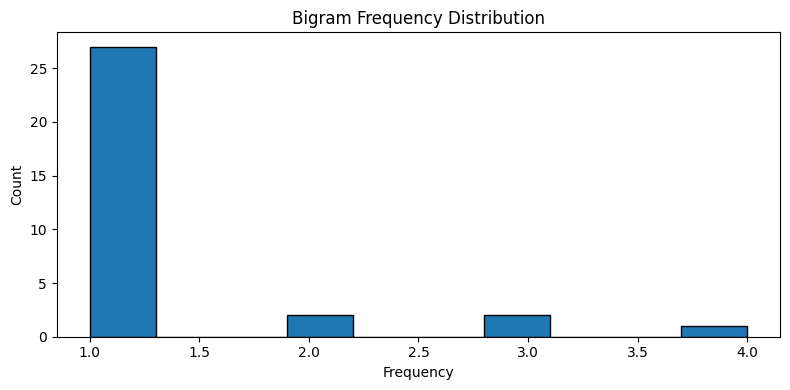

In [12]:
plt.figure(figsize=(8,4))
plt.hist(bigram_freq, bins=10, edgecolor='black')
plt.title("Bigram Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
summary_data = {
    "Vectorizer": ["BoW", "TF-IDF", "Bigrams"],
    "Features Extracted": [len(bow_features), len(tfidf_features), len(bigram_features)],
    "Matrix Shape": [bow_matrix.shape, tfidf_matrix.shape, bigram_matrix.shape]
}

summary_df = pd.DataFrame(summary_data)
print("\nComparison of Vectorization Methods:")
print(summary_df)


Comparison of Vectorization Methods:
  Vectorizer  Features Extracted Matrix Shape
0        BoW                  31      (8, 31)
1     TF-IDF                  31      (8, 31)
2    Bigrams                  32      (8, 32)
